<a href="https://colab.research.google.com/github/Ragavi-Ohm/Python-basics/blob/main/musicrecommendation_JCOMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import Recommenders as Recommenders
import matplotlib.pyplot as plt

In [29]:
song_df_1 = pd.read_csv("/content/triplets_file.csv")
song_df_1.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1.0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2.0
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1.0
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1.0
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1.0


In [30]:
song_df_2 = pd.read_csv("/content/song_data.csv")
song_df_2.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003.0
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995.0
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006.0
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003.0
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0.0


In [31]:
# combine both data
song_df = pd.merge(song_df_1, song_df_2.drop_duplicates(['song_id']), on='song_id', how='left')
song_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1.0,The Cove,Thicker Than Water,Jack Johnson,0.0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2.0,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976.0
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1.0,Stronger,Graduation,Kanye West,2007.0
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1.0,NaN,NaN,NaN,NaN
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1.0,NaN,NaN,NaN,NaN


In [32]:
print(len(song_df_1), len(song_df_2))

947845 749730


In [33]:
len(song_df)

947845

In [34]:
# creating new feature combining title and artist name
song_df['song'] = song_df['title']+' - '+song_df['artist_name']
song_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1.0,The Cove,Thicker Than Water,Jack Johnson,0.0,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2.0,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976.0,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1.0,Stronger,Graduation,Kanye West,2007.0,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1.0,NaN,NaN,NaN,NaN,NaN
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1.0,NaN,NaN,NaN,NaN,NaN


In [35]:
# taking top 10k samples for quick results
song_df = song_df.head(10000)

In [36]:
# cummulative sum of listen count of the songs
song_grouped = song_df.groupby(['song']).agg({'listen_count':'count'}).reset_index()
song_grouped.head()

,song,listen_count
0,#40 - DAVE MATTHEWS BAND,1
1,& Down - Boys Noize,4
2,'97 Bonnie & Clyde - Eminem,2
3,'Till I Collapse - Eminem / Nate Dogg,6
4,(Anaesthesia) Pulling Teath - Metallica,1


In [37]:
grouped_sum = song_grouped['listen_count'].sum()
song_grouped['percentage'] = (song_grouped['listen_count'] / grouped_sum ) * 100
song_grouped.sort_values(['listen_count', 'song'], ascending=[0,1])

,song,listen_count,percentage
3549,Undo - Björk,32,0.424685
3873,You're The One - Dwight Yoakam,32,0.424685
817,Dog Days Are Over (Radio Edit) - Florence + Th...,28,0.371599
3319,The Scientist - Coldplay,27,0.358328
3573,Use Somebody - Kings Of Leon,27,0.358328
...,...,...,...
3901,high fives - Four Tet,1,0.013271
3902,in white rooms - Booka Shade,1,0.013271
3904,paranoid android - Christopher O'Riley,1,0.013271
3909,¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,1,0.013271


In [38]:
pr = Recommenders.popularity_recommender_py()

In [39]:
pr.create(song_df, 'user_id', 'song')

In [40]:
# display the top 10 popular songs
new_recomdation_2 = pr.recommend(song_df['user_id'][5])
new_recomdation_2

,user_id,song,score,Rank
3549,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Undo - Björk,32,1.0
3873,b80344d063b5ccb3212f76538f3d9e43d87dca9e,You're The One - Dwight Yoakam,32,2.0
817,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Dog Days Are Over (Radio Edit) - Florence + Th...,28,3.0
3319,b80344d063b5ccb3212f76538f3d9e43d87dca9e,The Scientist - Coldplay,27,4.0
3573,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Use Somebody - Kings Of Leon,27,5.0
1422,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Horn Concerto No. 4 in E flat K495: II. Romanc...,23,6.0
3816,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Yellow - Coldplay,22,7.0
618,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Clocks - Coldplay,21,8.0
1992,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Lucky (Album Version) - Jason Mraz & Colbie Ca...,20,9.0
3449,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Tive Sim - Cartola,18,10.0


In [41]:
pr.recommend(song_df['user_id'][13])

,user_id,song,score,Rank
3549,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Undo - Björk,32,1.0
3873,b80344d063b5ccb3212f76538f3d9e43d87dca9e,You're The One - Dwight Yoakam,32,2.0
817,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Dog Days Are Over (Radio Edit) - Florence + Th...,28,3.0
3319,b80344d063b5ccb3212f76538f3d9e43d87dca9e,The Scientist - Coldplay,27,4.0
3573,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Use Somebody - Kings Of Leon,27,5.0
1422,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Horn Concerto No. 4 in E flat K495: II. Romanc...,23,6.0
3816,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Yellow - Coldplay,22,7.0
618,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Clocks - Coldplay,21,8.0
1992,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Lucky (Album Version) - Jason Mraz & Colbie Ca...,20,9.0
3449,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Tive Sim - Cartola,18,10.0


In [42]:
ir = Recommenders.item_similarity_recommender_py()
ir.create(song_df, 'user_id', 'song')

In [43]:
user_items = ir.get_user_items(song_df['user_id'][5])

In [44]:
# display user songs history
for user_item in user_items:
    print(user_item)

The Cove - Jack Johnson
Entre Dos Aguas - Paco De Lucia
Stronger - Kanye West
nan
Apuesta Por El Rock 'N' Roll - Héroes del Silencio
Paper Gangsta - Lady GaGa
Stacked Actors - Foo Fighters
Heaven's gonna burn your eyes - Thievery Corporation feat. Emiliana Torrini
Let It Be Sung - Jack Johnson / Matt Costa / Zach Gill / Dan Lebowitz / Steve Adams
I'll Be Missing You (Featuring Faith Evans & 112)(Album Version) - Puff Daddy
Love Shack - The B-52's
The Old Saloon - The Lonely Island
Behind The Sea [Live In Chicago] - Panic At The Disco
Champion - Kanye West
Country Road - Jack Johnson / Paula Fuga
Oh No - Andrew Bird
Love Song For No One - John Mayer
Jewels And Gold - Angus & Julia Stone
83 - John Mayer
Neon - John Mayer
The Middle - Jimmy Eat World
High and dry - Jorge Drexler
The Christmas Song  (LP Version) - King Curtis
Are You In? - Incubus
Drive - Incubus
Generator - Foo Fighters
He Doesn't Know Why - Fleet Foxes
Sun Giant - Fleet Foxes
Right Back - Sublime
Holes To Heaven - Jack J

In [45]:
# give song recommendation for that user
new_recomdation_1=ir.recommend(song_df['user_id'][5])
new_recomdation_1

No. of unique songs for the user: 30
no. of unique songs in the training set: 3912
Non zero values in cooccurence_matrix :2740


,user_id,song,score,rank
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Pablo Picasso/Mary Lou (Live) - John Cale,0.033333,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Song For The Dead - Queens Of The Stone Age,0.033333,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Skin And Bones - Foo Fighters,0.033333,3
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Oliver James - Fleet Foxes,0.030556,4
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Tiger Mountain Peasant Song - Fleet Foxes,0.030556,5
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Sun It Rises - Fleet Foxes,0.030556,6
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,I Don't Need A Man - The Pussycat Dolls,0.029167,7
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Hypnotized (featuring Akon) (Explicit Album Ve...,0.029167,8
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Like The Sea - Alicia Keys,0.029167,9
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Magic - The Pussycat Dolls,0.028095,10


In [46]:
ir.recommend(song_df['user_id'][100])

No. of unique songs for the user: 16
no. of unique songs in the training set: 3912
Non zero values in cooccurence_matrix :4317


,user_id,song,score,rank
0,e006b1a48f466bf59feefed32bec6494495a4436,Lucky (Album Version) - Jason Mraz & Colbie Ca...,0.067973,1
1,e006b1a48f466bf59feefed32bec6494495a4436,Alejandro - Lady GaGa,0.061995,2
2,e006b1a48f466bf59feefed32bec6494495a4436,The Scientist - Coldplay,0.059624,3
3,e006b1a48f466bf59feefed32bec6494495a4436,Bulletproof - La Roux,0.057184,4
4,e006b1a48f466bf59feefed32bec6494495a4436,Just Dance - Lady GaGa / Colby O'Donis,0.056700,5
5,e006b1a48f466bf59feefed32bec6494495a4436,Somebody To Love - Justin Bieber,0.054635,6
6,e006b1a48f466bf59feefed32bec6494495a4436,Clocks - Coldplay,0.050433,7
7,e006b1a48f466bf59feefed32bec6494495a4436,Bring Me To Life - Evanescence,0.050032,8
8,e006b1a48f466bf59feefed32bec6494495a4436,Canada - Five Iron Frenzy,0.049071,9
9,e006b1a48f466bf59feefed32bec6494495a4436,Catch You Baby (Steve Pitron & Max Sanna Radio...,0.048891,10


In [50]:
!pip install fuzzywuzzy
!pip install python-Levenshtein
import seaborn as sns
from scipy.sparse import csr_matrix
from knn_recommender import Recommender
from scipy.sparse import csr_matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 53.4 MB/s eta 0:00:00


Collaborative Filtering


In [51]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [52]:
#Read userid-songid-listen_count
song_info = pd.read_csv('triplets_file.csv')
#song_info.columns = ['user_id', 'song_id', 'listen_count']

#Read song  metadata
song_actual =  pd.read_csv('song_data.csv')
song_actual.drop_duplicates(['song_id'], inplace=True)

#Merge the two dataframes above to create input dataframe for recommender systems
songs = pd.merge(song_info, song_actual, on="song_id", how="left")

In [53]:
songs.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1.0,The Cove,Thicker Than Water,Jack Johnson,0.0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2.0,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976.0
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1.0,Stronger,Graduation,Kanye West,2007.0
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1.0,Constellations,In Between Dreams,Jack Johnson,2005.0
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1.0,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999.0


In [54]:
songs.to_csv('songs.csv', index=False)

In [55]:
df_songs = pd.read_csv('songs.csv')

Performing Exploratatory data analysis

In [56]:
df_songs.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1.0,The Cove,Thicker Than Water,Jack Johnson,0.0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2.0,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976.0
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1.0,Stronger,Graduation,Kanye West,2007.0
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1.0,Constellations,In Between Dreams,Jack Johnson,2005.0
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1.0,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999.0


In [57]:
#Get total observations
print(f"There are {df_songs.shape[0]} observations in the dataset")

There are 1413463 observations in the dataset


In [58]:
#Unique songs
unique_songs = df_songs['title'].unique().shape[0]
print(f"There are {unique_songs} unique songs in the dataset")

There are 9568 unique songs in the dataset


In [59]:
#Unique artists
unique_artists = df_songs['artist_name'].unique().shape[0]
print(f"There are {unique_artists} unique artists in the dataset")


There are 3376 unique artists in the dataset


In [ ]:
#Unique users
unique_users = df_songs['user_id'].unique().shape[0]
print(f"There are {unique_users} unique users in the dataset")

In [61]:
#count how many rows we have by song, we show only the ten more popular songs 
ten_pop_songs = df_songs.groupby('title')['listen_count'].count().reset_index().sort_values(['listen_count', 'title'], ascending = [0,1])
ten_pop_songs['percentage']  = round(ten_pop_songs['listen_count'].div(ten_pop_songs['listen_count'].sum())*100, 2)

In [62]:
ten_pop_songs = ten_pop_songs[:10]
ten_pop_songs

,title,listen_count,percentage
6836,Sehr kosmisch,5907,0.42
8725,Undo,5012,0.35
1964,Dog Days Are Over (Radio Edit),4972,0.35
9496,You're The One,4741,0.34
6498,Revelry,4335,0.31
6825,Secrets,4112,0.29
3437,Horn Concerto No. 4 in E flat K495: II. Romanc...,3768,0.27
2595,Fireflies,3394,0.24
3322,Hey_ Soul Sister,3364,0.24
8494,Tive Sim,3226,0.23


In [63]:
labels = ten_pop_songs['title'].tolist()
counts = ten_pop_songs['listen_count'].tolist()

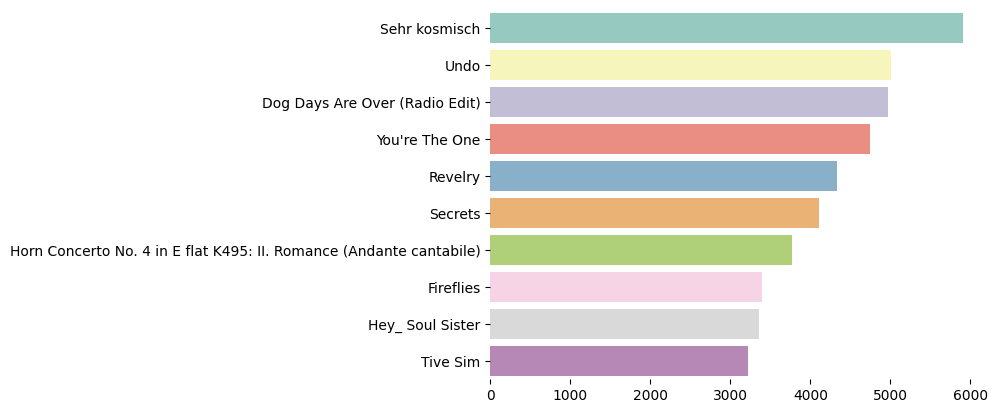

In [64]:
plt.figure()
sns.barplot(x=counts, y=labels, palette='Set3')
sns.despine(left=True, bottom=True)

In [65]:
#count how many rows we have by artist name, we show only the ten more popular artist 
ten_pop_artists  = df_songs.groupby(['artist_name'])['listen_count'].count().reset_index().sort_values(['listen_count', 'artist_name'], 
                                                                                                ascending = [0,1])

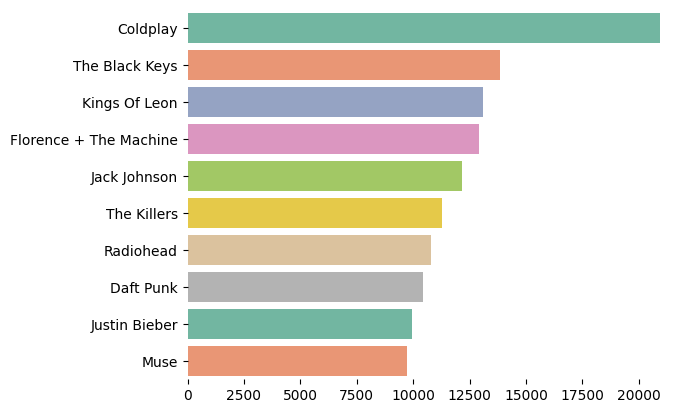

In [66]:
ten_pop_artists = ten_pop_artists[:10]
ten_pop_artists
plt.figure()
labels = ten_pop_artists['artist_name'].tolist()
counts = ten_pop_artists['listen_count'].tolist()
sns.barplot(x=counts, y=labels, palette='Set2')
sns.despine(left=True, bottom=True)

In [67]:
listen_counts = pd.DataFrame(df_songs.groupby('listen_count').size(), columns=['count'])
print(f"The maximum time the same user listened to the same songs was: {listen_counts.reset_index(drop=False)['listen_count'].iloc[-1]}")
print(f"On average, a user listen to the same song {df_songs['listen_count'].mean()} times")

The maximum time the same user listened to the same songs was: 2213.0
On average, a user listen to the same song 3.0411408301036746 times


In [68]:
listen_counts_temp = listen_counts[listen_counts['count'] > 50].reset_index(drop=False)

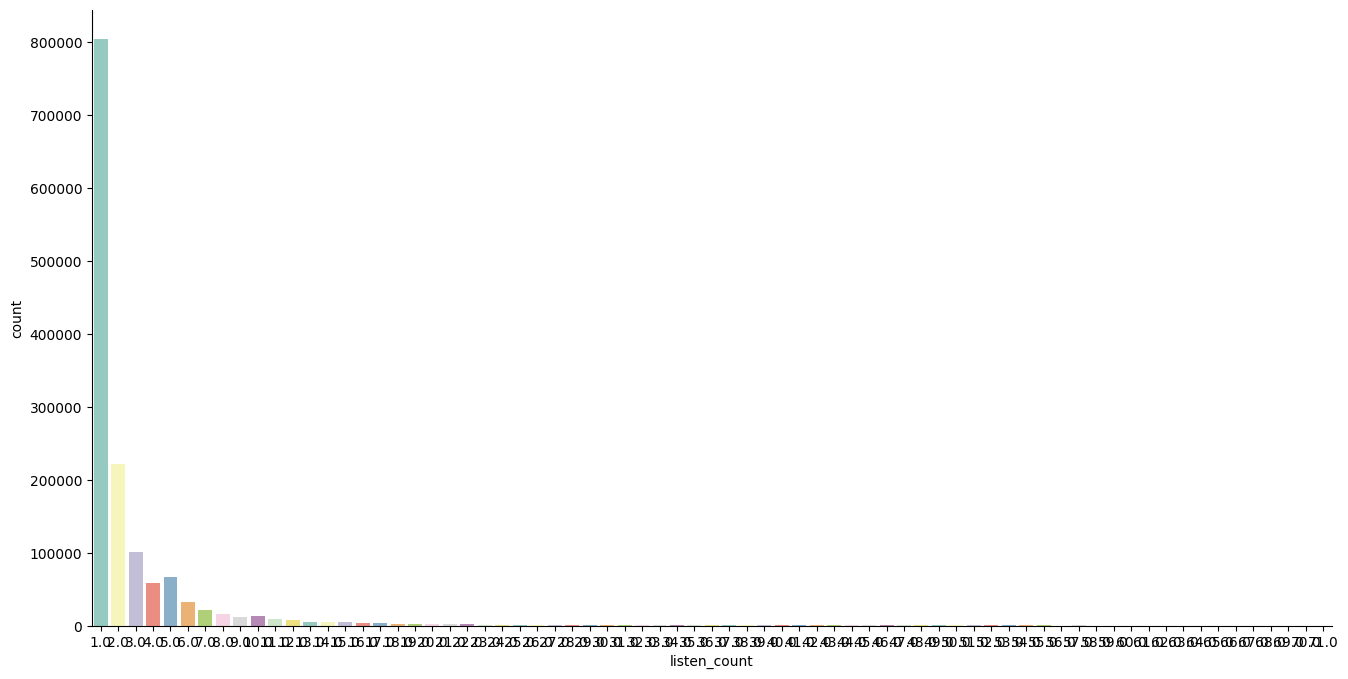

In [69]:
plt.figure(figsize=(16, 8))
sns.barplot(x='listen_count', y='count', palette='Set3', data=listen_counts_temp)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [70]:
song_user = df_songs.groupby('user_id')['song_id'].count()

<ipython-input-71-495547ecb817>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(song_user.values, color='orange')


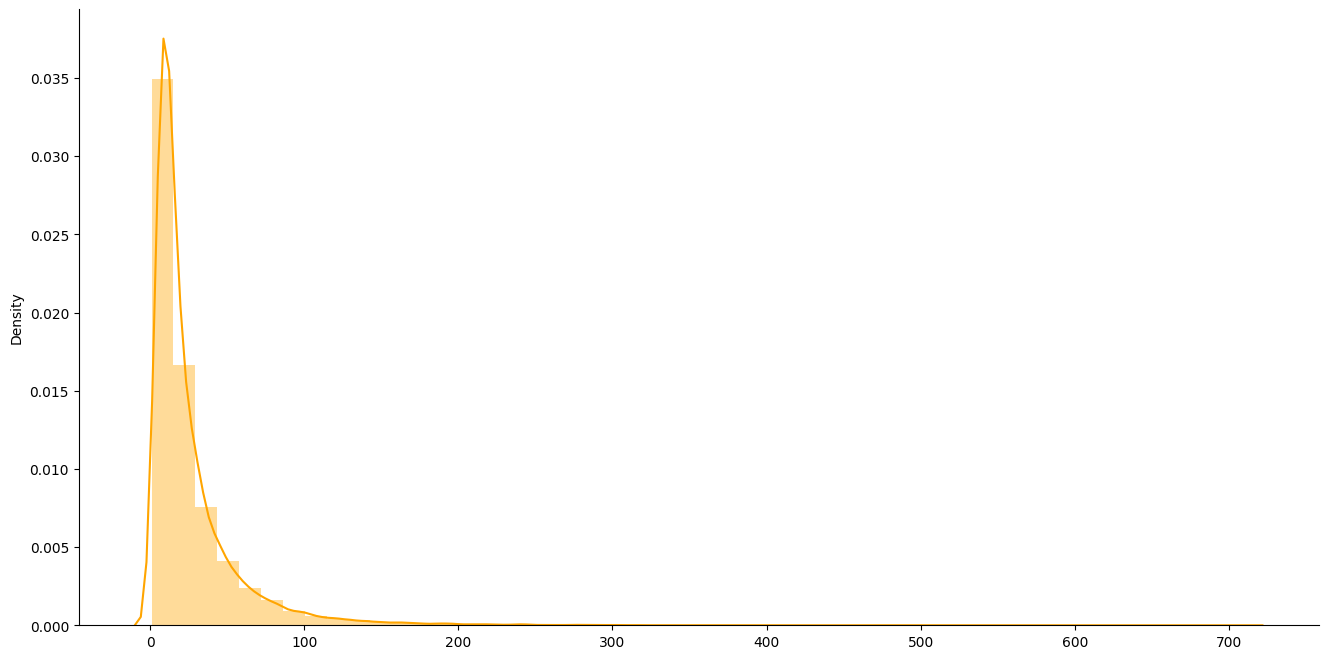

In [71]:
plt.figure(figsize=(16, 8))
sns.distplot(song_user.values, color='orange')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [72]:
print(f"A user listens to an average of {np.mean(song_user)} songs")
print(f"A user listens to an average of {np.median(song_user)} songs, with minimum {np.min(song_user)} and maximum {np.max(song_user)} songs")

A user listens to an average of 26.140386891552005 songs
A user listens to an average of 16.0 songs, with minimum 1 and maximum 711 songs


In [73]:
# Get how many values should it be if all songs have been listen by all users
values_matrix = unique_users * unique_songs
# Substract the total values with the actural shape of the DataFrame songs
zero_values_matrix = values_matrix - df_songs.shape[0]
print(f"The matrix of users x songs has {zero_values_matrix} values that are zero")

The matrix of users x songs has 515947433 values that are zero


Preparing the data


In [74]:
# Get users which have listen to at least 16 songs
song_ten_id = song_user[song_user > 16].index.to_list()
# Filtered the dataset to keep only those users with more than 16 listened
df_song_id_more_ten = df_songs[df_songs['user_id'].isin(song_ten_id)].reset_index(drop=True)

In [75]:
df_song_id_more_ten

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1.0,The Cove,Thicker Than Water,Jack Johnson,0.0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2.0,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976.0
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1.0,Stronger,Graduation,Kanye West,2007.0
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1.0,Constellations,In Between Dreams,Jack Johnson,2005.0
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1.0,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999.0
...,...,...,...,...,...,...,...
1155006,e8def8ecc245339afc3f8f9001b78742dc7734bd,SOYQKPA12A8C13F31A,1.0,Tradewinds (LP Version),Kona Town,Pepper,2002.0
1155007,e8def8ecc245339afc3f8f9001b78742dc7734bd,SOYVGVJ12A67ADBC70,1.0,Grind With Me (Explicit Version),Grind With Me,Pretty Ricky,0.0
1155008,e8def8ecc245339afc3f8f9001b78742dc7734bd,SOZBNFQ12A6701F07E,1.0,It's All Understood,Brushfire Fairytales,Jack Johnson,2000.0
1155009,e8def8ecc245339afc3f8f9001b78742dc7734bd,SOZHUUI12A6701D7B6,1.0,Swing_ Swing,The All-American Rejects,The All-American Rejects,2003.0


In [76]:
# convert the dataframe into a pivot table
df_songs_features = df_song_id_more_ten.pivot(index='song_id', columns='user_id', values='listen_count').fillna(0)

# obtain a sparse matrix
mat_songs_features = csr_matrix(df_songs_features.values)

In [77]:
type(mat_songs_features)

scipy.sparse._csr.csr_matrix

In [78]:

res = df_songs_features

In [79]:
res = res.iloc[:100,:100]

In [80]:
res

user_id,000ebc858861aca26bac9b49f650ed424cf882fc,000ef25cc955ad5841c915d269432eea41f4a1a5,0012bf75d43a724f62dc746d9e85ae0088a3a1d6,00185e316f07f0f00c325ca034be59c15b362401,001b005fe5e80d3cb45f320f5658fc8e2e72794e,001f22c638730aed5659034c447d3cf0e658898e,0021d9a4628624f6d70237f9c200ab82e766bf26,002543003041db1d049206b09426d5cdffc0f451,0028292aa536122c1f86fd48a39bd83fe582d27f,00292cf9c6d6e99c5ddbece7e37f957ab1362d25,...,00f90e5c96105887ab249575875fe2e26124ed94,00f95c5243e490b54a5a9d84816306d591edcea5,00fa5f40c82b00927646821414ca2ae019d5af4e,00fac82cef74c769e8c7cc52953b6c089cf0398f,00fc31ff7b3ae8b7cbf80efa83ad900d60aee77b,00ffe9019f39011fe14581034650726c940d4743,0101831a6b24c519980201122a307d5e885e56d4,0103a4da3c17bb11a619147f74cb8a75e7b31cbe,01054c0366b0fc1d6926e32f8fe573ebac8ea69b,010aae1948b5745b066537b367eb31ab1a2cdb3e
song_id,,,,,,,,,,,,,,,,,,,,,
SOAAAGQ12A8C1420C8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAACPJ12A81C21360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAACSG12AB018DC80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAAEJI12AB0188AB5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAAFAC12A67ADF7EB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SOAFRIN12A81C22087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAFTFX12A6D4F3B78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAFTRR12AF72A8D4D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
res.to_csv("file3.csv")

In [82]:
df_unique_songs = df_songs.drop_duplicates(subset=['song_id']).reset_index(drop=True)[['song_id', 'title']]

In [83]:
decode_id_song = {
    song: i for i, song in 
    enumerate(list(df_unique_songs.set_index('song_id').loc[df_songs_features.index].title))
}

In [84]:
decode_id_song

{'Orgelblut': 0,
 'Cearc Agus Coileach / The Hen And Cock': 1,
 'I Gotta Feeling (Edit)': 2,
 'Godlovesugly': 3,
 "Rome Wasn't Built In A Day": 4,
 'Jesus Loves You (Album Version)': 5,
 'End Of The World Party': 6,
 'So Confused (feat. Butta Creame) (amended album version)': 7,
 'Stay Awhile': 8,
 'Nomenclature': 9,
 'Criminal': 7225,
 'Juke Box Hero (Remastered LP Version )': 11,
 'Aunt Eggma Blowtorch': 12,
 'Radio': 13,
 "Love Don't Live Here Anymore": 14,
 'My Shepherd (Psalms 23) (featuring Kurt Carr & Avalon)': 15,
 'STARSTRUKK [FEATURINGKATYPERRY] (Explicit Bonus Version)': 16,
 'Hallelujah (Album Version)': 17,
 'Brand New Day': 5415,
 'Psycho': 19,
 'Shadow Of The Day (Album Version)': 20,
 'Back Against The Wall': 21,
 'Halo': 52,
 'Mass Appeal (Explicit)': 23,
 'The Canals Of Our City': 24,
 'Public Service Announcement (Interlude)': 25,
 'The Drying of the Lawns': 26,
 "You'll Never Know (Live Version)": 27,
 "Who's That Girl (Soundtrack Album Version)": 28,
 'A Pain That 

In [85]:
model = Recommender(metric='cosine', algorithm='brute',k=20, data=mat_songs_features, decode_id_song=decode_id_song)

In [86]:
model

In [87]:
song = 'I believe in miracles'

In [88]:
new_recommendations = model.make_recommendation(new_song=song, n_recommendations=10)

Starting the recommendation process for I believe in miracles ...
... Done


In [89]:
print(f"The recommendations for {song} are:")
print(f"{new_recommendations}")

The recommendations for I believe in miracles are:
['Just Like Heaven', 'If You Were A Sailboat', 'Nine Million Bicycles', "Spider's Web", 'I Cried For You', 'Piece By Piece', 'Blue Shoes', 'Blues In The Night', 'On The Road Again', 'Thank You Stars']


In [90]:
from collections import Counter
new_recommendations
# new_recomdation_2
a=list(new_recommendations)
c=list(new_recomdation_1['song'])
# a=new_recomdation_1['song']+new_recomdation_2['song']+new_recommendations
# a
b=list(new_recomdation_2['song'])
a=a+b+c
print(len(a))
a=Counter(a)
a

30


Counter({'Just Like Heaven': 1,
         'If You Were A Sailboat': 1,
         'Nine Million Bicycles': 1,
         "Spider's Web": 1,
         'I Cried For You': 1,
         'Piece By Piece': 1,
         'Blue Shoes': 1,
         'Blues In The Night': 1,
         'On The Road Again': 1,
         'Thank You Stars': 1,
         'Undo - Björk': 1,
         "You're The One - Dwight Yoakam": 1,
         'Dog Days Are Over (Radio Edit) - Florence + The Machine': 1,
         'The Scientist - Coldplay': 1,
         'Use Somebody - Kings Of Leon': 1,
         'Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile) - Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner': 1,
         'Yellow - Coldplay': 1,
         'Clocks - Coldplay': 1,
         'Lucky (Album Version) - Jason Mraz & Colbie Caillat': 1,
         'Tive Sim - Cartola': 1,
         'Pablo Picasso/Mary Lou (Live) - John Cale': 1,
         'Song For The Dead - Queens Of The Stone Age': 1,
         'Sk